Start by importing all the libraries i will be using

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Makes graph display in notebook
%matplotlib inline   

Import my data

In [2]:
supermarket_data = pd.read_csv('../input/train.csv')

In [3]:
supermarket_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
#Displaty the number of rows and columns
supermarket_data.shape

(4990, 13)

In [5]:
supermarket_data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [6]:
supermarket_data.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                  object
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
dtype: object

In [7]:
#Remove Id columns
cols_2_remove = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']

new_data = supermarket_data.drop(cols_2_remove, axis=1)

In [8]:
new_data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [9]:
cat_cols = ['Product_Fat_Content','Product_Type',
            'Supermarket _Size', 'Supermarket_Location_Type',
           'Supermarket_Type' ]

num_cols = ['Product_Weight', 'Product_Shelf_Visibility',
            'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']

In [10]:
for col in cat_cols:
    print('Value Count for', col)
    print(new_data[col].value_counts())
    print("---------------------------")

Value Count for Product_Fat_Content
Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64
---------------------------
Value Count for Product_Type
Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64
---------------------------
Value Count for Supermarket _Size
Medium    1582
Small     1364
High       594
Name: Supermarket _Size, dtype: int64
---------------------------
Value Count for Supermarket_Location_Type
Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Supermarket_Location_Type, dt

## DATA VISUALIZATION
### BAR PLOT

In [11]:
counts = new_data['Supermarket_Type'].value_counts() # find the counts for each unique category
counts

Supermarket Type1    3304
Grocery Store         724
Supermarket Type2     500
Supermarket Type3     462
Name: Supermarket_Type, dtype: int64

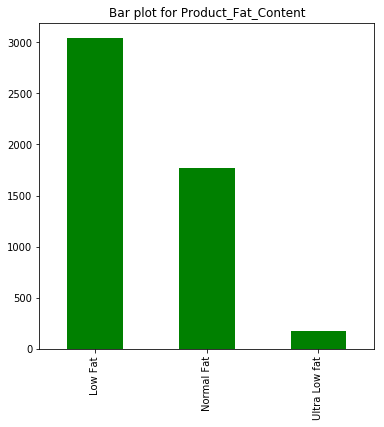

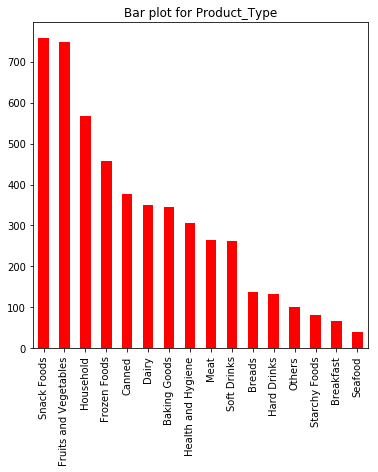

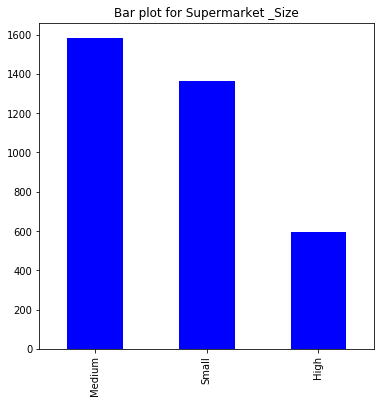

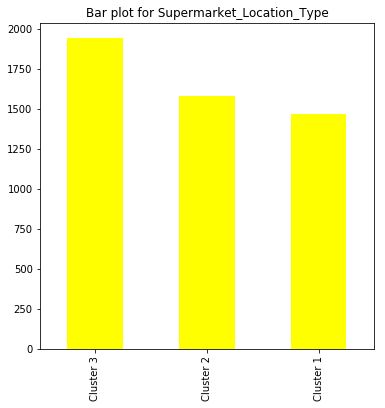

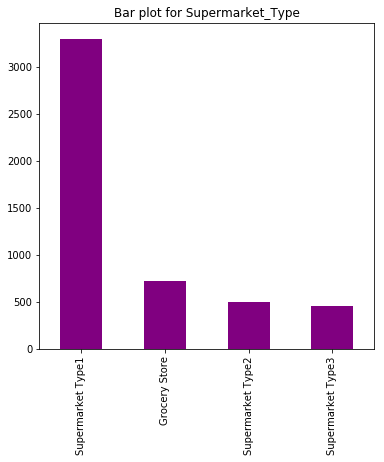

In [12]:
colors = ['green', 'red', 'blue', 'yellow', 'purple']

for i,col in enumerate(cat_cols):
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = new_data[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax, color = colors[i]) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)



# Scatter plot for Numerical Features

In [13]:
new_data.head(3)

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69


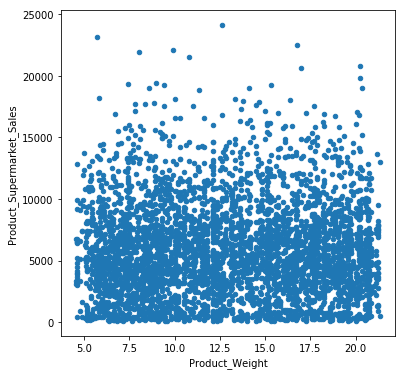

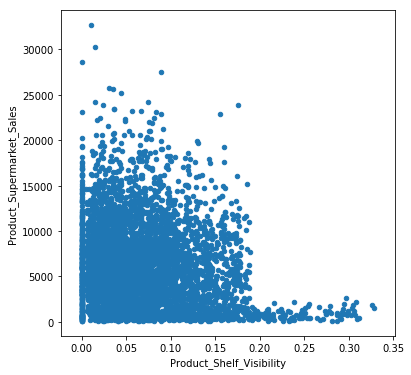

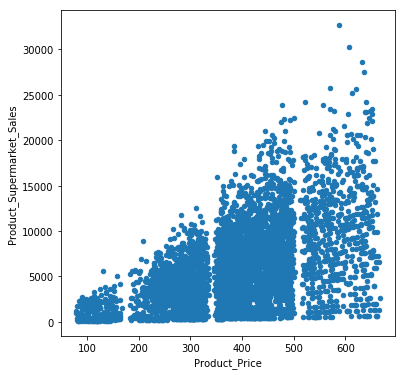

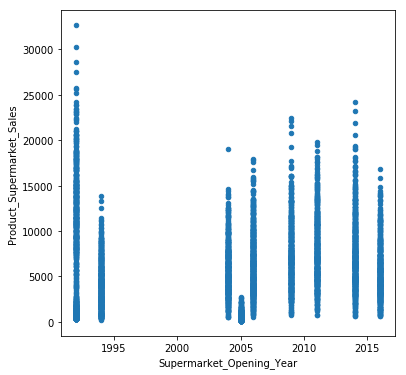

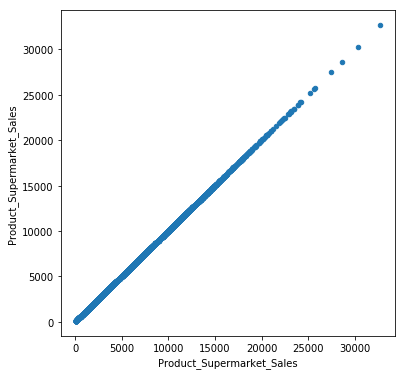

In [14]:
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    new_data.plot.scatter(x = col, y = 'Product_Supermarket_Sales', ax = ax)


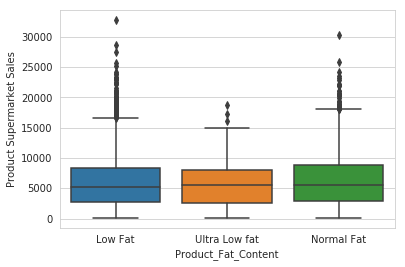

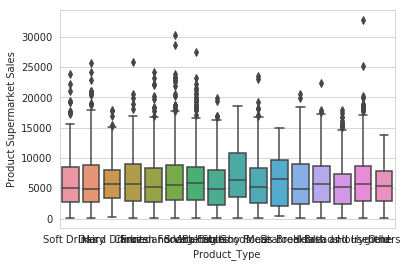

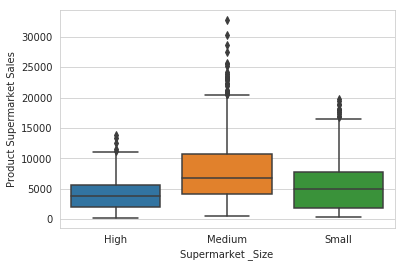

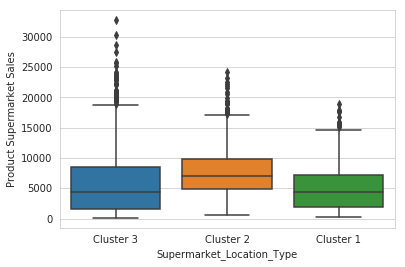

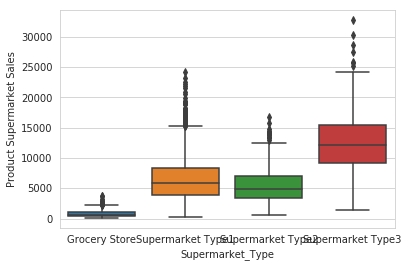

In [15]:
for col in cat_cols:
    sns.set_style("whitegrid")
    sns.boxplot(col, 'Product_Supermarket_Sales', data=new_data)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel('Product Supermarket Sales')# Set text for y axis
    plt.show()
  

## FEATURE ENGINEERING

Transform categorical features into numerical features

In [16]:
#save the target value
y_target = new_data['Product_Supermarket_Sales']
new_data.drop(['Product_Supermarket_Sales'], axis=1, inplace=True)

In [17]:
new_data.head(2)

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1


__Option 1: You can use the pandas get_dummies function when working smaller categories__

In [18]:
# dummy_data = pd.get_dummies(new_data)
# dummy_data.head()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for cat in cat_cols:
    lb = LabelEncoder()
    lb.fit(list(new_data[cat].values))
    new_data[cat] = lb.transform(list(new_data[cat].values))

In [21]:
new_data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,11.6,0,0.068535,14,357.54,2005,3,2,0
1,11.6,0,0.040912,14,355.79,1994,0,2,1
2,11.6,0,0.041178,14,350.79,2014,3,1,1
3,11.6,0,0.041113,14,355.04,2016,1,2,2
4,11.6,2,0.000000,14,354.79,2011,2,1,1


## Fill in Missing Values

In [22]:
new_data.isnull().sum()

Product_Weight               802
Product_Fat_Content            0
Product_Shelf_Visibility       0
Product_Type                   0
Product_Price                  0
Supermarket_Opening_Year       0
Supermarket _Size              0
Supermarket_Location_Type      0
Supermarket_Type               0
dtype: int64

In [23]:
mean_pw = np.mean(new_data['Product_Weight'])

In [24]:
new_data['Product_Weight'].fillna(mean_pw, inplace=True)

In [25]:
new_data.isnull().sum()

Product_Weight               0
Product_Fat_Content          0
Product_Shelf_Visibility     0
Product_Type                 0
Product_Price                0
Supermarket_Opening_Year     0
Supermarket _Size            0
Supermarket_Location_Type    0
Supermarket_Type             0
dtype: int64

In [26]:
new_data.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
0,11.6,0,0.068535,14,357.54,2005,3,2,0
1,11.6,0,0.040912,14,355.79,1994,0,2,1
2,11.6,0,0.041178,14,350.79,2014,3,1,1
3,11.6,0,0.041113,14,355.04,2016,1,2,2
4,11.6,2,0.000000,14,354.79,2011,2,1,1


## PERFORM NORMALIZATION AND SCALING

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(new_data)

scaled_data = scaler.transform(new_data)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [29]:
# Split our data into train and test set
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y_target, test_size = 0.3)

In [31]:
print("Shape of train data", X_train.shape)
print("Shape of train target ", y_train.shape)
print("Shape of test data", X_test.shape)
print("Shape of test target", y_test.shape)

Shape of train data (3493, 9)
Shape of train target  (3493,)
Shape of test data (1497, 9)
Shape of test target (1497,)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

In [33]:
# Using Linear Model
lm = LinearRegression()
lm.fit(X_train, y_train)

#Prediction
predictions_lm = lm.predict(X_test)

#Calculate error
lm_error = mean_absolute_error(y_test, predictions_lm)
print("Mean Absolute Error for Linear model is", lm_error)

Mean Absolute Error for Linear model is 2439.6319498269227


In [34]:
# Using Linear Model
rand_model = RandomForestRegressor(n_estimators=400, max_depth=6)
rand_model.fit(X_train, y_train)

#Prediction
predictions_rf = rand_model.predict(X_test)

#Calculate error
rf_error = mean_absolute_error(y_test, predictions_rf)
print("Mean Absolute Error for Random Forest model is", rf_error)

Mean Absolute Error for Random Forest model is 2096.189999142311


In [35]:
# Using ensemble technique
xgb_model = xgb.XGBRegressor(max_depth=4, n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train, y_train)

#Prediction
predictions_xgb = xgb_model.predict(X_test)

#Calculate error
xgb_error = mean_absolute_error(y_test, predictions_xgb)
print("Mean Absolute Error for XGB model is", xgb_error)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Absolute Error for XGB model is 2238.631308000089
